# Explicación

Este programa nos muestra las variables macroscópicas en función de dos variables: temperatura y campo magnético externo

# Paquetería necesaria

In [1]:
using PyPlot
using Interact
using LaTeXStrings

# Variables requeridas

In [25]:
function Inicializar_variables(k)
    global L=k
    global N=L*L
    global caracterizacion = "WL2D_red-cuadrada_L-$(L)_Ising-ferro_cam-10_f-0.0001"
    println(caracterizacion)
    global datos
    global cabecera
    datos, cabecera = readdlm("Entropia_2D_final/Entropia_2D_final_$(caracterizacion).txt", header=true)
    global temp_inicial = 1.8
    global temp_final = 2.8
    global cantidad_de_temperaturas = 41
    global temperatura = linspace(temp_inicial,temp_final,cantidad_de_temperaturas)
    global β = 1./temperatura
    global h_inicial = 0.0
    global h_final = 2.0
    global δh = 0.5
    global h = (h_inicial:δh:h_final)
    global card_β = length(β)
    global card_h = length(h)
    global l = size(datos)[1]
    global energía_promedio = [0.0 for i in 1:card_β, j in 1:card_h];
    global magnetización_promedio = [0.0 for i in 1:card_β, j in 1:card_h];
    global parámetro_de_orden_promedio = [0.0 for i in 1:card_β, j in 1:card_h];
    global capacidad_calorífica = [0.0 for i in 1:card_β, j in 1:card_h];
    global susceptibilidad_magnética = [0.0 for i in 1:card_β, j in 1:card_h];
end

Inicializar_variables (generic function with 1 method)

# Definiendo funciones

## Gráficas de entropía experimental y teórica con animación

In [3]:
function Grafica3d(angle,x,y,z)
    plot3D(x,y,z, ".", alpha=0.2 )
        ax = gca()
        ax[:view_init](elev=30., azim=angle)
end

Grafica3d (generic function with 1 method)

In [4]:
function Animar_grafica3d(x,y,z)
    fig = figure(figsize=(8,6))
    @manipulate for angle=0:10:360
        withfig(fig) do
            Grafica3d(angle,x,y,z)
        end
    end
end 

Animar_grafica3d (generic function with 1 method)

In [5]:
function Grafica3d_teórica(angle,x,y,z)
    plot3D(x, y, log(z), "o", alpha=0.2 )
    ax = gca()
    ax[:view_init](elev=30., azim=angle)
end

Grafica3d_teórica (generic function with 1 method)

## Funciones para  obtener observables

In [6]:
function Renormalización(i,j)
    maximum(datos[:,3]-β[i]*(datos[:,1]-h[j]*datos[:,2]))
end

Renormalización (generic function with 1 method)

In [7]:
function Variables_Macroscópicas_variando_β_y_h_con_L_fija(i,j)
    función_de_partición_1D = 0.0
    función_de_partición_2D = 0.0
    energía = 0.0
    energía_cuadrada = 0.0
    magnetización = 0.0
    magnetización_cuadrada = 0.0
    parámetro_de_orden = 0.0
    exponencial = 0.0
    renormalización = Renormalización(i,j)
    for k in 1:l
        exponencial = exp(datos[k,3] - β[i]*(datos[k,1]-h[j]*datos[k,2]) - renormalización)
        función_de_partición_2D += exponencial
        energía += abs(datos[k,1])*exponencial
        energía_cuadrada += datos[k,1]*datos[k,1]*exponencial
        magnetización += abs(datos[k,2])*exponencial
        magnetización_cuadrada += datos[k,2]*datos[k,2]*exponencial
        parámetro_de_orden += abs(datos[k,4])*exponencial
    end
    energía_promedio[i,j] = (energía)/(función_de_partición_2D*N)
    magnetización_promedio[i,j] = (magnetización)/(función_de_partición_2D*N)
    parámetro_de_orden_promedio[i,j] = (parámetro_de_orden)/(función_de_partición_2D*N)
    capacidad_calorífica[i,j] = abs(energía_cuadrada - energía*energía)/(función_de_partición_2D*N)
    susceptibilidad_magnética[i,j] = abs(magnetización_cuadrada - magnetización*magnetización)/(función_de_partición_2D*N)
end

Variables_Macroscópicas_variando_β_y_h_con_L_fija (generic function with 1 method)

In [8]:
function Obtener_variables_macroscópicas()
    for i=1:card_β
        for j=1:card_h
            #println("$i,$j")
            Variables_Macroscópicas_variando_β_y_h_con_L_fija(i,j)
        end
    end
end

Obtener_variables_macroscópicas (generic function with 1 method)

## Gáficas de observables

In [9]:
function Mostrar_varias_observables()
    fig = figure()
    @manipulate for i in 1:card_h
        withfig(fig) do
            subplot(221)
            ylim(0,1.05)
            xlabel(L"T")
            ylabel(L"m")
            plot(temperatura,parámetro_de_orden_promedio[:,i], label = latexstring("h=$(h[i])"))
            legend()
            subplot(222)
            xlabel(L"T")
            ylabel(L"u")
            plot(temperatura,energía_promedio[:,i], label = latexstring("h=$(h[i])"))
            legend()
            subplot(223)
            xlabel(L"T")
            ylabel(L"c_v")
            plot(temperatura,capacidad_calorífica[:,i], label = latexstring("h=$(h[i])"))
            legend()
            subplot(224)
            xlabel(L"T")
            ylabel(L"x")
            plot(temperatura,susceptibilidad_magnética[:,i], label = latexstring("h=$(h[i])"))
            legend()
        end
    end
end

Mostrar_varias_observables (generic function with 1 method)

## Gráfica de observables vs temperatura con $h$ fija

ARGUMENTOS DE LA FUNCIÓN:

***observables_macroscópicas***: conjunto de valores de la observable para cada valor de temperatura

***cadena***: Nombre del eje Y

In [30]:
function Grafica_observable_macroscópica_con_h_fija(valor_de_h,observable_macroscópica, eje_y, título)
    xlabel(L"T")
    ylabel(eje_y)
    title(título)
    plot(temperatura,observable_macroscópica, ".", label = latexstring(L"h="*"$(valor_de_h)"))
    legend()
end

Grafica_observable_macroscópica_con_h_fija (generic function with 2 methods)

## Gráfica de observable vs temperatura para varias $h$'s 

In [21]:
function Grafica_varias_observables_para_distintos_h(observable_macroscópica, cadena)
    for i in 1:card_β
        ylim(0,1.05)
        plot(temperatura,observable_macroscópica[:,i],label = latexstring("h=$(h[i])"))
        #legend (loc="upper right")
        xlabel(L"T")
        ylabel(cadena)
        title(cadena*" en función de "*L"h")
        legend()
    end
end

Grafica_varias_observables_para_distintos_h (generic function with 1 method)

## Parámetro de orden 3D, como función de $\beta$ y $h$

In [12]:
function Parámetro_de_orden_3D()    
    fig = figure(figsize=(5,4))
    @manipulate for angle=0:10:360
        withfig(fig) do
            surf(temperatura, h, magnetización_promedio', alpha=0.4, rstride=3, cstride=3)
            ax = gca()
            ax[:view_init](elev=30., azim=angle)
            xlabel(L"T")
            ylabel(L"h")
            zlabel(L"m")
        end
    end
end

Parámetro_de_orden_3D (generic function with 1 method)

# Aquí acaban las funciones

In [13]:
Inicializar_variables(16);

WL2D_red-cuadrada_L-16_Ising-ferro_cam-10_f-0.0001


In [14]:
Obtener_variables_macroscópicas();

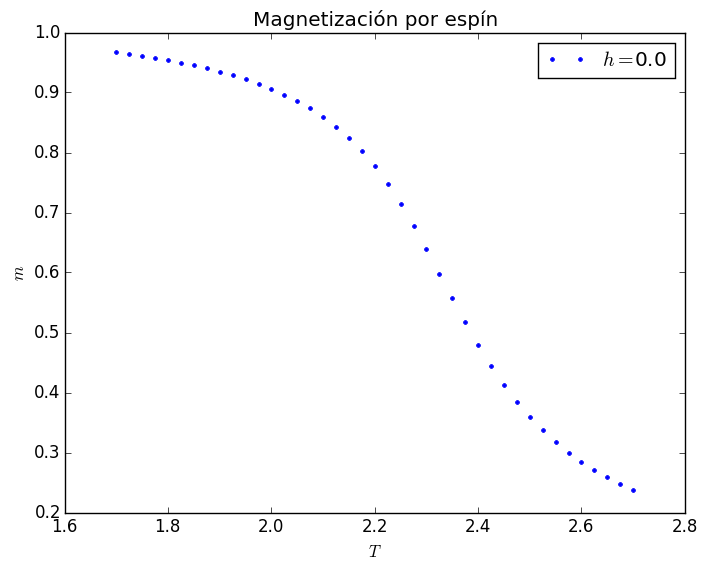

In [31]:
i=1
Grafica_observable_macroscópica_con_h_fija(h[i],magnetización_promedio[:,i],L"m","Magnetización por espín");

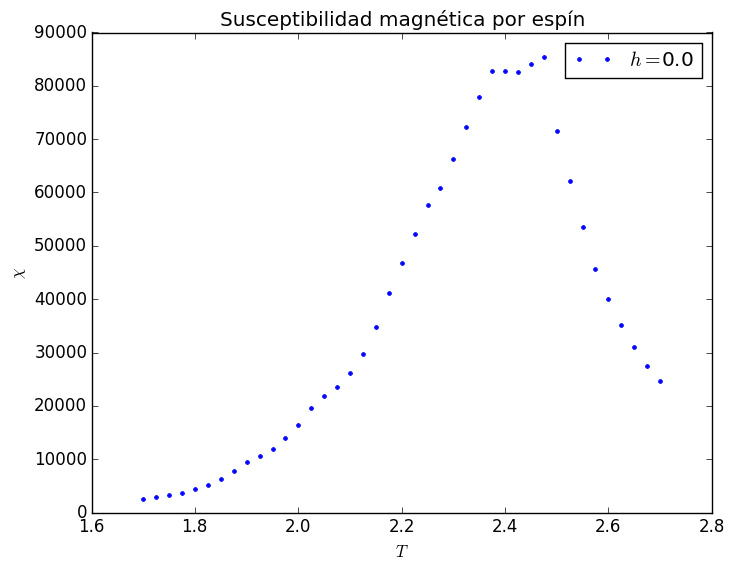

In [32]:
i=1
Grafica_observable_macroscópica_con_h_fija(h[i],susceptibilidad_magnética[:,i],L"\chi", "Susceptibilidad magnética por espín");

Interact.Slider{Int64}(Signal{Int64}(3, nactions=0),"i",3,1:5,true)

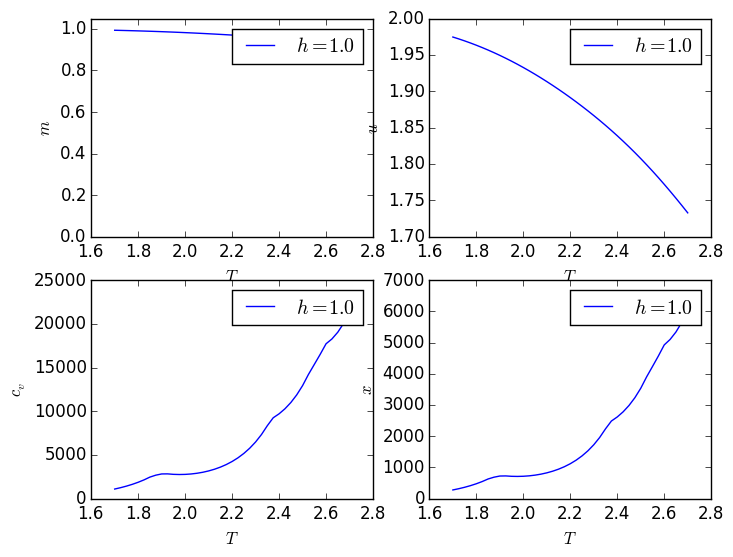

In [17]:
Mostrar_varias_observables()